# 第8-9次实验实验报告
计算机系 计15 2021010803 郭高旭

## 第8.10题：排放污水

### 问题分析与算法设计

由于污水处理的费用与污水处理前后的浓度差和污水流量成正比,而每个工厂的污水流量和污水浓度均已知道.所以为了计算污水处理的费用,也就是需要考虑每个工厂处理后的污水流量.设三个工厂处理后的污水流量分别为$x_1,x_2,x_3$,则处理费用也即带优化f(x)即为:
$$
f(x)=5(100-x_1)+5(60-x_2)+5(50-x_3)
$$
下面根据(1),(2)问分别给出约束条件
- 问题(1)的约束条件
  要求江面上所有地段的水污染达到国家标准,则显然每个工厂排水处的污水浓度为江面污染极大值.所以只需要保证每个工厂处理后的污水浓度不超过国家标准即可,即(下面均为化简后结果):
  - 工厂1: $ 5x_1 \leq 205$
  - 工厂2: $ 4.5 x_1 + 5 x_2 \leq 290$
  - 工厂3: $ 2.7 x_1 + 3 x_2 + 5 x_3 \leq 583$
- 问题(2)的约束条件
  问题(2)要求居民点上游的污水浓度达标,可以假设处理站略微在每个居民点下游,这样到达每个居民点的污水完全是上游工厂产生而且经过江水自净,那么居民点1的污水浓度就是江水本身浓度,是达标的,其余两个约束分别是
  - 工厂2: $ 4.5x_1 \leq 285$
  - 工厂3: $ 2.7 x_1 + 3 x_2 \leq 583$
- 考虑到实际情况，每个工厂处理后的污水浓度应该大于等于0且小于等于未处理的污水浓度,即
  - 工厂1: $ 0 \leq x_1 \leq 100$
  - 工厂2: $ 0 \leq x_2 \leq 80$
  - 工厂3: $ 0 \leq x_3 \leq 60$
根据上面的约束条件,可以使用`scipy.optimize.linprog`函数求解,代码如下:

### 代码实现与结果
下面是代码实现，使用python实现了<>的计算

In [168]:
import numpy as np
from scipy.optimize import linprog

c = -5*np.array([1,1,1])
bounds=[(0, 100),(0, 60),(0, 50)]
A1_ub=np.array([[5,0,0],[4.5,5,0],[2.7,3,5]])
b1_ub=np.array([205,290,583])
A2_ub=np.array([[4.5,0,0],[2.7,3,0]])
b2_ub=np.array([285,578])
q1=linprog(c, A_ub=A1_ub, b_ub=b1_ub, bounds=bounds, method='highs')
if(q1.success):
    print("第一问情况下，三个工厂处理后的污水排放量分别为：",q1.x,"，最小费用为：",q1.fun+5*210)

q2=linprog(c, A_ub=A2_ub, b_ub=b2_ub, bounds=bounds, method='highs')
if(q2.success):
    print("第二问情况下，三个工厂处理后的污水排放量分别为：",q2.x,"，最小费用为：",q2.fun+5*210)

第一问情况下，三个工厂处理后的污水排放量分别为： [41.  21.1 50. ] ，最小费用为： 489.5
第二问情况下，三个工厂处理后的污水排放量分别为： [63.33333333 60.         50.        ] ，最小费用为： 183.33333333333326


### 结果分析

- 模型优化的比较简单，两个问题都在很少的迭代次数内就收敛了
- 第一问情况下，三个工厂处理后的污水排放量分别为： 41.0,21.1,50.0 (mg/L) ，最小费用为： 589.5 万元
- 第二问情况下，三个工厂处理后的污水排放量分别为： 63.3,60,60 (mg/L) ，最小费用为： 183.3 万元
- 这比较合理，因为第二问的约束条件更加宽松，所以最小费用更小

### 实际意义
同过计算可以得到最优的污水处理方案，可以减少污水处理费用，减少污染物排放，保护环境。同时也可以为企业提供经济效益，使得在满足环保要求的情况下，尽可能减少污水处理费用。

## 第9.4题：液体混合
### 问题分析与模型建立
这是一个生产混合物 A 和 B 的生产问题，根据题目要求，实际上就是甲乙丙三种原料各分出两份分别用于生产 A 和 B 同时甲乙在AB中含量比例相等，所以可以设甲乙丙三种原料的总量分别为 $x_1,x_2,x_3，x_4,x_5,x_6$，那么甲乙丙三种原料分别用于生产 A 和 B 的量分别为 $x_1,x_2,x_3$ 和 $x_4,x_5,x_6$，那么问题就转化为了求解如下优化问题：
$$
f(x)=9(x_1+x_2+x_3)+15(x_4+x_5+x_6)-6(x_1+x_4)-16(x_2+x_5)-10(x_3+x_6)=3x_1-7x_2-x_3+9x_4-x_5+5x_6 \tag {q1}
$$
$$
f(x)=3x_1-4x_2-x_3+9x_4+2x_5+5x_6 \tag {q2}
$$
求解f(x)的最大值，转变为求-f(x)的最小值而约束条件为
- 各项原料的总量约束
  - 甲：$x_1+x_4\leq 500$
  - 乙：$x_2+x_5 \leq 500$
  - 丙：$x_3+x_6 \leq 500$
- 各项原料大于等于0
  - $x_1,x_2,x_3,x_4,x_5,x_6 \geq 0$
- 产量不超过最大需求
  - A: $x_1+x_2+x_3 \leq 100$ ,如果是第二问则为 $x_1+x_2+x_3 \leq 600$
  - B: $x_4+x_5+x_6 \leq 200$
- 产物含硫量达标
  - A: $0.03x_1+0.01x_2+0.02x_3 \leq 0.025(x_1+x_2+x_3)$
  - B: $0.03x_4+0.01x_5+0.02x_6 \leq 0.015(x_4+x_5+x_6)$
- 甲乙比例在A,B中相等
  - $x_1*x_5=x_2*x_4$
  > 在实际应用中,这是不对的,必须使用比例式.

根据上面的约束条件,可以使用`scipy.optimize.minimize`函数求解,代码如下:

### 代码实现与结果


In [169]:
import numpy as np
from scipy.optimize import minimize

c = -np.array([3,-7,-1,9,-1,5])
c3 = -np.array([3,-4,-1,9,2,5])

def objective(x):
    return np.dot(c, x)

def objective3(x):
    return np.dot(c3, x)

def total_constraint_1(x):
    return -(x[0]+x[3]-500)

def total_constraint_2(x):
    return -(x[1]+x[4]-500)

def total_constraint_3(x):
    return -(x[2]+x[5]-500)

def outcame_constraint_A(x):
    return -(x[0]+x[1]+x[2]-100)

def outcame_constraint_A2(x):
    return -(x[0]+x[1]+x[2]-600)

def outcame_constraint_B(x):
    return -(x[3]+x[4]+x[5]-200)

def sulfur_constraint_1(x):
    return -(x[0] - 3*x[1] - x[2])

def sulfur_constraint_2(x):
    return -(3*x[3] - x[4] + x[5])

def porpotion_constraint(x):
    return x[0]*x[4] - x[1]*x[3]

constrains_1 = ({'type': 'ineq', 'fun': total_constraint_1},
                {'type': 'ineq', 'fun': total_constraint_2},
                {'type': 'ineq', 'fun': total_constraint_3},
                {'type': 'ineq', 'fun': outcame_constraint_A},
                {'type': 'ineq', 'fun': outcame_constraint_B},
                {'type': 'ineq', 'fun': sulfur_constraint_1},
                {'type': 'ineq', 'fun': sulfur_constraint_2},
                {'type': 'eq', 'fun': porpotion_constraint})

q1 = minimize(objective, [20,20,20,20,20,20], constraints=constrains_1,bounds=[(0, 1000),(0, 1000),(0, 1000),(0, 1000),(0, 1000),(0, 1000)])
print(q1)

constrains_2  = ({'type': 'ineq', 'fun': total_constraint_1},
                    {'type': 'ineq', 'fun': total_constraint_2},
                    {'type': 'ineq', 'fun': total_constraint_3},
                    {'type': 'ineq', 'fun': outcame_constraint_A2},
                    {'type': 'ineq', 'fun': outcame_constraint_B},
                    {'type': 'ineq', 'fun': sulfur_constraint_1},
                    {'type': 'ineq', 'fun': sulfur_constraint_2},
                    {'type': 'eq', 'fun': porpotion_constraint})

random_array = np.array([911,448,227,282,965,215])
q2 = minimize(objective, random_array, constraints=constrains_2,bounds=[(0, 1000),(0, 1000),(0, 1000),(0, 1000),(0, 1000),(0, 1000)])
print(q2)

random_array = np.array([0,0,0,50,150,0])
q3_1= minimize(objective3, random_array, constraints=constrains_1,bounds=[(0, 1000),(0, 1000),(0, 1000),(0, 1000),(0, 1000),(0, 1000)])
random_array = np.array([918,434,391,480,446,830])
q3_2= minimize(objective3, random_array, constraints=constrains_2,bounds=[(0, 1000),(0, 1000),(0, 1000),(0, 1000),(0, 1000),(0, 1000)])
print(q3_1)
print(q3_2)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -399.9999999999958
       x: [ 0.000e+00  3.970e-13  2.287e-14  0.000e+00  1.000e+02
            1.000e+02]
     nit: 14
     jac: [-3.000e+00  7.000e+00  1.000e+00 -9.000e+00  1.000e+00
           -5.000e+00]
    nfev: 111
    njev: 13
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -599.9999999999978
       x: [ 3.000e+02  2.401e-13  3.000e+02  0.000e+00  0.000e+00
            0.000e+00]
     nit: 22
     jac: [-3.000e+00  7.000e+00  1.000e+00 -9.000e+00  1.000e+00
           -5.000e+00]
    nfev: 140
    njev: 20
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -750.0
       x: [ 0.000e+00  0.000e+00  0.000e+00  5.000e+01  1.500e+02
            0.000e+00]
     nit: 1
     jac: [-3.000e+00  4.000e+00  1.000e+00 -9.000e+00 -2.000e+00
           -5.000e+00]
    nfev: 7
    njev: 1
 message: Optimization terminated successfully
 succe

### 结果分析

- 现在的优化由于条件比较复杂，所以需要多次随机化初始guess值并多次迭代才能收敛,并且还需要多次随机化guess值才能得到最优解
- 观察输出,最后几个项目均收敛并成功退出.
- 在使用保持甲乙比例相等的约束条件时遇到了许多困难,如果是用比例式可能遇到除零错误,所以使用了乘积式,但是这样的约束条件可能会导致与事实不符,
- eq约束比ineq约束要更难满足

### 结论

- 经过多次随机化初始guess值找到的最优结果如下
- 第一问:购买100t乙原料和100t丙原料全部用于生产B，最大收益为400k元
- 第二问,购买300t甲原料和300t丙原料全部用于生产A，最大收益为600k元
- 第三问,两种情况都是购买50t甲和150t乙原料全部用于生产B，最大收益为750k元

### 意义

通过计算可以得到最优的原料购买方案，可以最大化收益，减少成本，提高效益。同时也可以为企业提供经济效益，使得在满足生产需求的情况下，尽可能减少原料购买费用。


## 第8题：购买股票

### 问题分析与模型建立

这是一个股票购买问题，首先明确未知量,可设购买股票A,B,C的资金比例分别为$x_1,x_2,x_3(x_1+x_2+x_3=1)$,根据三种股票的历史数据,可以得到每种股票的期望收益(收益平均值)与相对应风险(标准差).设三种股票的期望收益为$E_1,E_2,E_3$,则总收益为:
$$
E(x)=E_1x_1+E_2x_2+E_3x_3
$$
总风险为:
$$
D(x)=D[x_1E_1+x_2E_2+x_3E_3]=x_1^2D_1+x_2^2D_2+x_3^2D_3+2x_1x_2Cov_{12}+2x_1x_3Cov_{13}+2x_2x_3Cov_{23}
$$
据此可以求解第一问的最优化问题:在收益大于等于15的情况下,最小化风险,即求解如下优化问题:
$$
f(x)=D(x) \tag {q1}
$$
约束条件为:
- 资金比例约束
  - $x_1,x_2,x_3 \geq 0$
  - $x_1+x_2+x_3=1$
- 收益约束
  - $E(x) \geq 0.15$



### 代码实现与结果

Q1:A, B, C的权重为： [0.53009262 0.35640755 0.11349984] 方差为： 0.02241377684163736


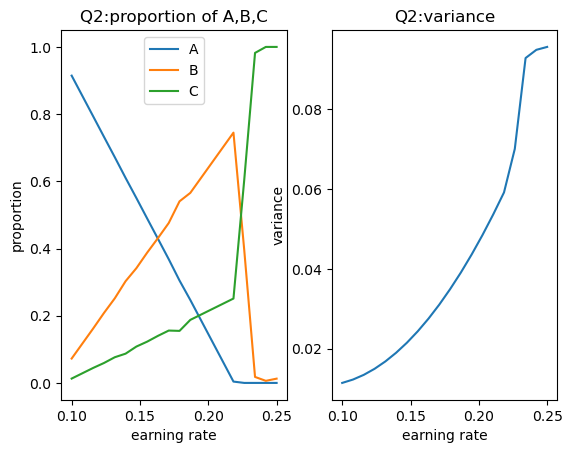

Q1:A, B, C的权重为： [0.52838086 0.36831474 0.1033044 ] 方差为： 0.0224183754538808
Q3:A, B, C,D的权重为： [0.04928598 0.43754781 0.14335936 0.36980686]
不进行交换时，A,B,C的权重为： [0.5, 0.35, 0.15] 方差为： 0.024098535511363636 收益率为： 0.15451250000000005
Q4:为保持相同利率A, B, C的权重为： [0.52901929 0.35       0.12098071] 方差为： 0.022518802057997108


In [171]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

price_data = np.array(
    [
        [1.300, 1.225, 1.149, 1.050],
        [1.103, 1.290, 1.260, 1.050],
        [1.216, 1.216, 1.419, 1.050],
        [0.954, 0.728, 0.922, 1.050],
        [0.929, 1.144, 1.169, 1.050],
        [1.056, 1.107, 0.965, 1.050],
        [1.038, 1.321, 1.133, 1.050],
        [1.089, 1.305, 1.732, 1.050],
        [1.090, 1.195, 1.021, 1.050],
        [1.083, 1.390, 1.131, 1.050],
        [1.035, 0.928, 1.006, 1.050],
        [1.176, 1.715, 1.908, 1.050],
    ]
)

# 定义优化问题的参数
commission_rate = 0.01
mean_price = np.mean(price_data, axis=0)
cov_matrix = np.cov(price_data, rowvar=False)

# 初始权重向量
initial_weights = np.array([0.5, 0.35, 0.15])

# 定义函数以计算加权方差
def weighted_variance(x, n):
    return np.dot(np.dot(x, cov_matrix[:n, :n]), x)

# 定义收益率约束函数
def earning_rate_constraint(x, n, rate):
    return np.sum(x * mean_price[:n]) - (1 + rate)

# 定义约束条件
def constraints(x, n, rate):
    return [
        {"type": "eq", "fun": lambda x: np.sum(x) - 1},
        {"type": "ineq", "fun": lambda x: earning_rate_constraint(x, n, rate)},
    ]

# 定义优化函数
def optimize_portfolio(n, rate):
    x0 = np.random.rand(n)
    bounds = Bounds(np.zeros(n), np.ones(n))
    res = minimize(weighted_variance, x0, args=(n,), constraints=constraints(x0, n, rate), bounds=bounds,method='SLSQP')
    return res.x, res.fun

# 运行优化
x_A_B_C, var_A_B_C = optimize_portfolio(3, 0.15)
print("Q1:A, B, C的权重为：", x_A_B_C, "方差为：", var_A_B_C)

exp_array=np.linspace(0.1,0.25,20)
#draw the graph
a_array,b_array,c_array=[],[],[]
var_array=[]
for exp in exp_array:
    x_A_B_C, var_A_B_C = optimize_portfolio(3, exp)
    a_array.append(x_A_B_C[0])
    b_array.append(x_A_B_C[1])
    c_array.append(x_A_B_C[2])
    var_array.append(var_A_B_C)
#subplot 1 is about a,b,c ,subplot 2 is about var
plt.subplot(1,2,1)
plt.plot(exp_array,a_array  ,label='A')
plt.plot(exp_array,b_array  ,label='B')
plt.plot(exp_array,c_array  ,label='C')
plt.xlabel('earning rate')
plt.ylabel('proportion')
plt.title('Q2:proportion of A,B,C')
plt.legend()
plt.subplot(1,2,2)
plt.plot(exp_array,var_array)
plt.xlabel('earning rate')
plt.ylabel('variance')
plt.title('Q2:variance')
plt.show()

x_A_B_C, var_A_B_C = optimize_portfolio(3, 0.15)
print("Q1:A, B, C的权重为：", x_A_B_C, "方差为：", var_A_B_C)
x_A_B_C_D, var_A_B_C_D = optimize_portfolio(4, 0.15)
print("Q3:A, B, C,D的权重为：", x_A_B_C_D)


x0=[0.5,0.35,0.15]
expectation = np.sum(x0 * mean_price[:3])-1
var=weighted_variance(x0,3)
print("不进行交换时，A,B,C的权重为：", x0, "方差为：", var,"收益率为：",expectation)

# 定义收益率约束函数
def earning_rate_constraint(x, n, rate):
    return np.sum(x * mean_price[:n]) - (1 + rate)-0.01*np.abs(x-x0)

# 定义约束条件
def constraints(x, n, rate):
    return [
        {"type": "eq", "fun": lambda x: np.sum(x) - 1},
        {"type": "ineq", "fun": lambda x: earning_rate_constraint(x, n, rate)},
    ]

# 定义优化函数
def optimize_portfolio(n, rate):
    x0 = np.random.rand(n)
    bounds = Bounds(np.zeros(n), np.ones(n))
    res = minimize(weighted_variance, x0, args=(n,), constraints=constraints(x0, n, rate), bounds=bounds,method='SLSQP')
    return res.x, res.fun

x_A_B_C, var_A_B_C = optimize_portfolio(3, 0.15)
print("Q4:为保持相同利率A, B, C的权重为：", x_A_B_C, "方差为：", var_A_B_C)

### 结果分析与结论

- Q0:A, B, C的权重为： [0.53009258 0.35640775 0.11349967]
- Q2:结果如上图所示,注意到平均收益最大不可能超过max(E)-1,所以最大收益约为0.25,超过这个值的约束条件不能得到满足,随着要求利润期望增加,风险也会增加,这是合理的;同时更高利润的品种占比也会增加,这也是合理的.
- Q3:A, B, C, D (国债)的权重为： [0.0844375  0.4289896  0.14350485 0.34306805]
- 在考虑换手费用的情况下,满足利润要求的条件下,换手后方差仍然减小了,因此可以换手

### 意义
通过计算可以得到最优的股票购买方案，可以最大化收益，减少风险。同时也可以为投资者提供经济效益，使得在满足收益要求的情况下，尽可能减少风险。
